In [8]:
from  truthfinder import *
import json
veritas_modelpath='../../veritas_models/veritas_ptsd.pkl.gz'

In [6]:
DIAGNOSIS_THRESHOLD

1.35

In [14]:
filepath='/home/ishanu/Dropbox/paraknowledge/paraknowledgecorp/saas/cloud_functions/test_deployments/ptsd.json'
with open(filepath, 'r') as file:
    data = json.load(file)

In [15]:
R=reveal(data,veritas_modelpath)

ckeck passed


In [19]:
[(x.get('veritas'),x.get('score')) for x in R[0]]

[(0.9097560975609756, 0.33509215406485493),
 (0.9171483622350675, 0.32206048570689677),
 (0.9023090586145648, 0.40335636243749823),
 (0.8835616438356164, 0.48732794286450404),
 (0.9002932551319648, 0.36275254499520077),
 (0.7718120805369127, 0.6875845596857845),
 (0.8459796149490374, 0.5723146803202088),
 (0.8036363636363637, 0.7346105039217373),
 (0.7209062821833162, 1.2676665250829504),
 (0.6861702127659575, 1.8425360174376486),
 (0.6759656652360515, 1.7322245556420828)]

In [214]:
SEL=INDEX[:20]
pathdata='/home/ishanu/ZED/Research/truthnet/notebooks/data/ptsd/PTSD_cognet_test.csv'
df=pd.read_csv(pathdata,index_col=0)
featurenames=df.drop('PTSDDx',axis=1).columns
INDEX=load_from_pkl_gz(veritas_modelpath)['model'].shap_index
training_index=load_from_pkl_gz(veritas_modelpath)['model'].training_index
test_index=[x for x in df.index.values if x not in training_index]
df_test=df.loc[test_index,:]
df_test_pos=df_test[df_test.PTSDDx==1]
df_test_neg=df_test[df_test.PTSDDx==0]
X_pos=pd.concat([pd.DataFrame(columns=featurenames),
                 df_test_pos.drop('PTSDDx',axis=1)[SEL]])\
                .fillna('').values.astype(str)

X_neg=pd.concat([pd.DataFrame(columns=featurenames),
                 df_test_neg.drop('PTSDDx',axis=1)[SEL]])\
                .fillna('').values.astype(str)
D=df_test_pos.drop('PTSDDx',axis=1)[SEL].T.to_dict()
X_pos_json=[{key:D[key]} for key in D.keys()]
D=df_test_neg.drop('PTSDDx',axis=1)[SEL].T.to_dict()
X_neg_json=[{key:D[key]} for key in D.keys()]

In [215]:
Rposjson=reveal(X_pos_json,veritas_modelpath,perturb=0)
rpos_=[(x.get('veritas'),x.get('score'),x.get('lower_threshold')) for x in Rposjson[0]]
rpos=pd.DataFrame(rpos_,columns=['veritas','upper','lower'])

ckeck passed


In [117]:
Rnegjson=reveal(X_neg_json,veritas_modelpath,perturb=0)
rneg_=[(x.get('veritas'),x.get('score'),x.get('lower_threshold')) for x in Rnegjson[0]]
rneg=pd.DataFrame(rneg_,columns=['veritas','upper','lower'])

ckeck passed


In [126]:
rpos[rpos.veritas>.76]

,veritas,upper,lower
6,0.866667,0.795759,1.097593
7,0.827381,0.618186,1.666876
12,0.827381,0.887134,1.519650
15,0.821429,0.921690,1.386687
17,0.816667,1.153851,1.262134
19,0.837719,1.236486,1.267416
22,0.800000,1.259175,1.342402
24,0.879762,1.232002,1.007534
31,0.804115,0.651352,1.527723
33,0.861905,0.729010,1.686308


In [202]:
from jupyterthemes import jtplot
jtplot.style()
import  seaborn  as sns
from distfit import distfit
from scipy.stats import norm
from scipy.stats import t, lognorm
dfit=distfit(distr='lognorm')
dfit.fit_transform(rpos.lower.values)
df,loc,scale=dfit.model['params']
dist = lognorm(df, loc=loc, scale=scale)
dist.cdf(.895)

[distfit] >INFO> fit
[distfit] >INFO> transform
[distfit] >INFO> [lognorm] [0.07 sec] [RSS: 2.91877] [loc=0.713 scale=0.360]
[distfit] >INFO> Compute confidence intervals [parametric]


0.09210331827725049

In [203]:
dist.ppf(.1)

0.8993808685476138

In [120]:
dfit1=distfit(distr='lognorm')
dfit1.fit_transform(rneg.lower.values)
df,loc,scale=dfit1.model['params']
dist1 = lognorm(df, loc=loc, scale=scale)
dist1.cdf(.895)

[distfit] >INFO> fit
[distfit] >INFO> transform
[distfit] >INFO> [lognorm] [0.15 sec] [RSS: 1.63105] [loc=-3.207 scale=4.535]
[distfit] >INFO> Compute confidence intervals [parametric]


0.025977047176188865

In [216]:
a=rpos.upper.values
a.sort()
a

array([0.61818625, 0.65135173, 0.71671935, 0.72901026, 0.74780939,
       0.77388055, 0.79575922, 0.81772224, 0.88713412, 0.92168978,
       0.94644874, 1.11150281, 1.14333709, 1.15385132, 1.21944826,
       1.22757912, 1.23200237, 1.23648576, 1.2501204 , 1.25917512,
       1.26394277, 1.335388  , 1.41304903, 1.4175454 , 1.41808256,
       1.42535297, 1.44709139, 1.52429658, 1.52436725, 1.53289797,
       1.56044154, 1.56780055, 1.61260081, 1.62521674, 1.65875399,
       1.66674337, 1.67380805, 1.69388289, 1.70100003, 1.73058405,
       1.73284467, 1.73586463, 1.74533245, 1.7679126 , 1.77182159,
       1.81351091, 1.85291081, 1.88185479, 1.89738515, 1.93491583,
       1.93532055, 1.95270131, 2.11502736, 2.15402558, 2.30438221,
       2.33458003])

In [211]:
dfitu=distfit()
dfitu.fit_transform(rpos.upper.values)
#dfu,locu,scaleu=dfitu.model['params']
#distu = lognorm(dfu, loc=locu, scale=scaleu)
#distu.cdf(.895)

[distfit] >INFO> fit
[distfit] >INFO> transform
[distfit] >INFO> [norm      ] [0.00 sec] [RSS: 0.324982] [loc=1.449 scale=0.431]
[distfit] >INFO> [expon     ] [0.00 sec] [RSS: 1.19947] [loc=0.618 scale=0.831]
[distfit] >INFO> [pareto    ] [0.00 sec] [RSS: 1.19947] [loc=-67108863.382 scale=67108864.000]
[distfit] >INFO> [dweibull  ] [0.03 sec] [RSS: 0.663937] [loc=1.476 scale=0.392]
[distfit] >INFO> [t         ] [0.19 sec] [RSS: 0.324961] [loc=1.449 scale=0.431]
[distfit] >INFO> [genextreme] [0.05 sec] [RSS: 0.282765] [loc=1.313 scale=0.445]
[distfit] >INFO> [gamma     ] [0.07 sec] [RSS: 0.340557] [loc=-7.528 scale=0.021]
[distfit] >INFO> [lognorm   ] [0.13 sec] [RSS: 0.326434] [loc=-91.659 scale=93.109]
[distfit] >INFO> [beta      ] [0.04 sec] [RSS: 0.369045] [loc=0.603 scale=1.759]
[distfit] >INFO> [uniform   ] [0.00 sec] [RSS: 0.498556] [loc=0.618 scale=1.716]
[distfit] >INFO> [loggamma  ] [0.03 sec] [RSS: 0.286744] [loc=-2.627 scale=1.575]
[distfit] >INFO> Compute confidence interva

{'model': {'name': 'genextreme',
  'score': 0.2827649999316773,
  'loc': 1.3126604588496118,
  'scale': 0.44482238508330674,
  'arg': (0.35858676778361154,),
  'params': (0.35858676778361154, 1.3126604588496118, 0.44482238508330674),
  'model': <scipy.stats._distn_infrastructure.rv_continuous_frozen at 0x7f8aedce14e0>,
  'bootstrap_score': 0,
  'bootstrap_pass': None,
  'color': '#e41a1c',
  'CII_min_alpha': 0.7146631038073404,
  'CII_max_alpha': 2.1255484248005865},
 'summary':           name     score              loc       scale  \
 0   genextreme  0.282765          1.31266    0.444822   
 1     loggamma  0.286744        -2.627314    1.574768   
 2            t  0.324961         1.449372    0.430652   
 3         norm  0.324982         1.449329    0.430665   
 4      lognorm  0.326434       -91.659135   93.108546   
 5        gamma  0.340557        -7.527844    0.021138   
 6         beta  0.369045         0.603072    1.759341   
 7      uniform  0.498556         0.618186    1.71639

[distfit] >INFO> Create pdf plot for the parametric method.
[distfit] >INFO> Estimated distribution: Genextreme(loc:1.312660, scale:0.444822)


(<Figure size 1440x1080 with 1 Axes>,
 <AxesSubplot:title={'center':'\ngenextreme(c=0.358587, loc=1.31266, scale=0.444822)'}, xlabel='Values', ylabel='Frequency'>)

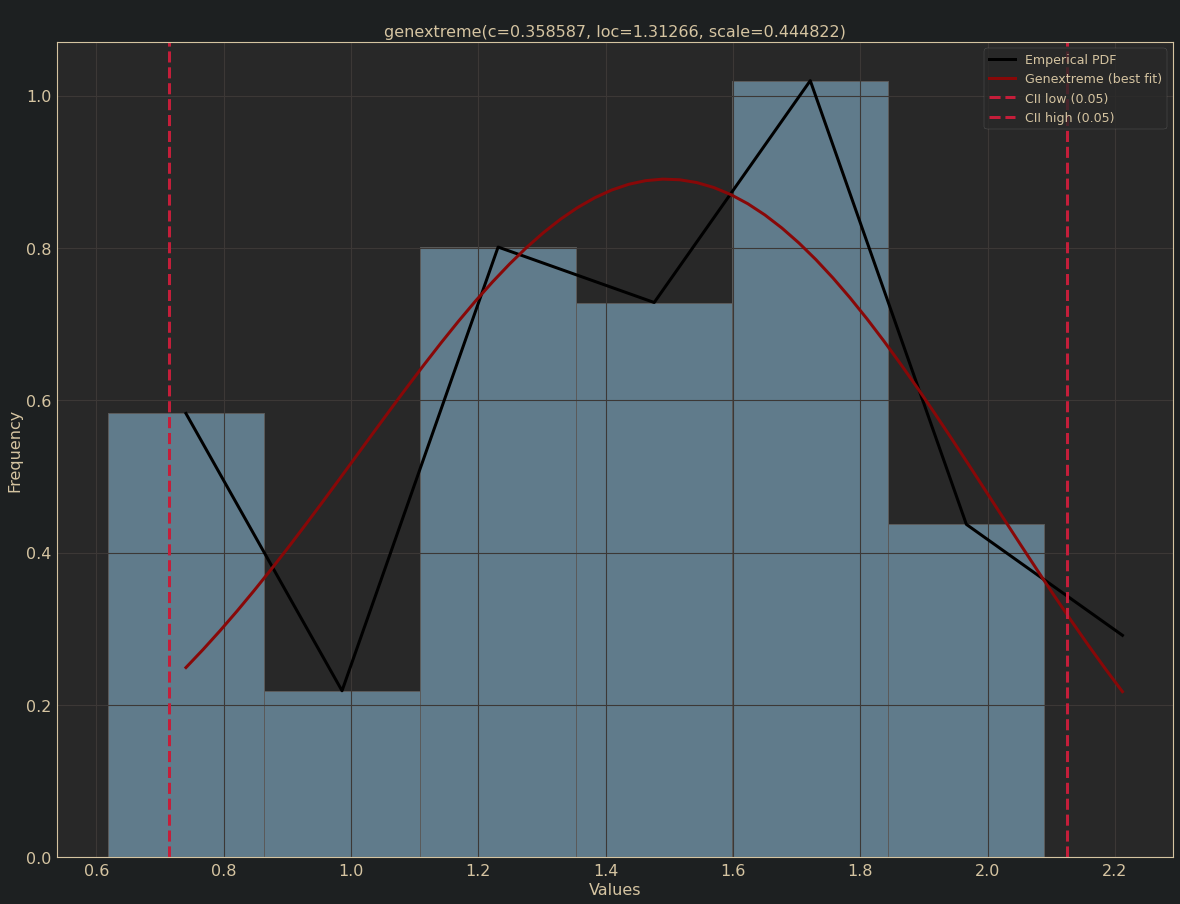

In [212]:
dfitu.plot()

In [205]:
distu.ppf(.1)

0.8987980639193154

In [219]:
b=rpos.veritas.values
b.sort()
b

array([0.55119048, 0.5698876 , 0.6202381 , 0.63536379, 0.63809524,
       0.65      , 0.6547619 , 0.6547619 , 0.66666667, 0.67255149,
       0.67255149, 0.67261905, 0.67261905, 0.67479675, 0.67850387,
       0.67850387, 0.67850387, 0.67857143, 0.67857143, 0.67857143,
       0.67857143, 0.68333333, 0.68333333, 0.68562718, 0.68928571,
       0.68928571, 0.69020597, 0.69615835, 0.69642857, 0.69642857,
       0.70595238, 0.70595238, 0.70687264, 0.71401549, 0.71590704,
       0.72380952, 0.73333333, 0.7473836 , 0.75635145, 0.8       ,
       0.8       , 0.8041153 , 0.81666667, 0.82142857, 0.82738095,
       0.82738095, 0.82738095, 0.83333333, 0.8377193 , 0.86190476,
       0.86666667, 0.87735192, 0.8797619 , 0.88333333, 0.89642857,
       0.94880952])

[distfit] >INFO> fit
[distfit] >INFO> transform
[distfit] >INFO> [smoothline] >Smoothing by interpolation..
[distfit] >INFO> [norm      ] [0.00 sec] [RSS: 41.8401] [loc=0.730 scale=0.087]
[distfit] >INFO> [expon     ] [0.00 sec] [RSS: 44.4146] [loc=0.551 scale=0.179]
[distfit] >INFO> [pareto    ] [0.01 sec] [RSS: 44.4146] [loc=-16777215.449 scale=16777216.000]
[distfit] >INFO> [dweibull  ] [0.07 sec] [RSS: 45.9729] [loc=0.679 scale=0.069]
[distfit] >INFO> [t         ] [0.16 sec] [RSS: 41.8397] [loc=0.730 scale=0.087]
[distfit] >INFO> [genextreme] [0.10 sec] [RSS: 43.377] [loc=0.693 scale=0.075]
[distfit] >INFO> [gamma     ] [0.02 sec] [RSS: 42.6129] [loc=0.454 scale=0.027]
[distfit] >INFO> [lognorm   ] [0.08 sec] [RSS: 43.024] [loc=0.364 scale=0.357]
[distfit] >INFO> [beta      ] [0.11 sec] [RSS: 42.538] [loc=0.457 scale=33.955]
[distfit] >INFO> [uniform   ] [0.00 sec] [RSS: 43.2518] [loc=0.551 scale=0.398]
[distfit] >INFO> [loggamma  ] [0.08 sec] [RSS: 41.5574] [loc=-18.639 scale=2.79

(<Figure size 1440x1080 with 1 Axes>,
 <AxesSubplot:title={'center':'\nloggamma(c=1012.5, loc=-18.639, scale=2.79905)'}, xlabel='Values', ylabel='Frequency'>)

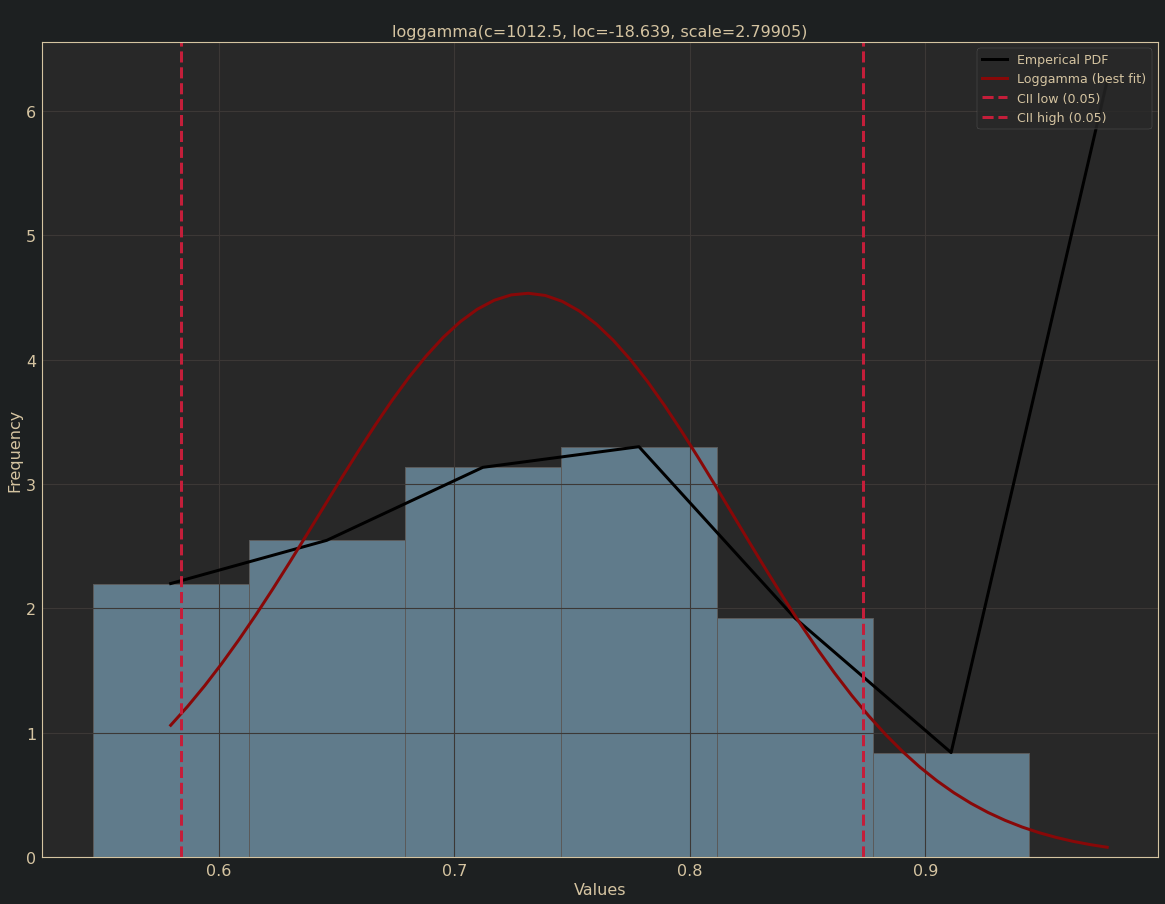

In [221]:
dfitv=distfit(smooth=5)
dfitv.fit_transform(rpos.veritas.values)
dfitv.plot()

In [136]:
catindex=np.loadtxt('catindex.txt',dtype='str')
catindex

array(['ptsd190', 'ptsd158', 'ptsd192', 'ptsd99', 'ptsd147', 'ptsd155',
       'ptsd188', 'ptsd150', 'ptsd30', 'ptsd144', 'ptsd16', 'ptsd162',
       'ptsd88', 'ptsd93', 'ptsd18', 'ptsd152', 'ptsd169', 'ptsd159',
       'ptsd195', 'ptsd210', 'ptsd160', 'ptsd165', 'ptsd87', 'ptsd179',
       'ptsd163', 'ptsd146', 'ptsd183', 'ptsd209', 'ptsd151', 'ptsd182',
       'ptsd48', 'ptsd84', 'ptsd211', 'ptsd62', 'ptsd81', 'ptsd108',
       'ptsd189', 'ptsd180', 'ptsd145', 'ptsd168', 'ptsd79', 'ptsd153',
       'ptsd86', 'ptsd207', 'ptsd148', 'ptsd77', 'ptsd25', 'ptsd78',
       'ptsd173', 'ptsd89', 'ptsd80', 'ptsd29', 'ptsd187', 'ptsd184',
       'ptsd63', 'ptsd127', 'ptsd170', 'ptsd37', 'ptsd156', 'ptsd75'],
      dtype='<U7')

In [138]:
SEL=catindex
pathdata='/home/ishanu/ZED/Research/truthnet/notebooks/data/ptsd/PTSD_cognet_test.csv'
df=pd.read_csv(pathdata,index_col=0)
featurenames=df.drop('PTSDDx',axis=1).columns
#INDEX=load_from_pkl_gz(veritas_modelpath)['model'].shap_index
training_index=load_from_pkl_gz(veritas_modelpath)['model'].training_index
test_index=[x for x in df.index.values if x not in training_index]
df_test=df.loc[test_index,:]
df_test_pos=df_test[df_test.PTSDDx==1]
df_test_neg=df_test[df_test.PTSDDx==0]
X_posSEL=pd.concat([pd.DataFrame(columns=featurenames),
                 df_test_pos.drop('PTSDDx',axis=1)[SEL]])\
                .fillna('').values.astype(str)

X_negSEL=pd.concat([pd.DataFrame(columns=featurenames),
                 df_test_neg.drop('PTSDDx',axis=1)[SEL]])\
                .fillna('').values.astype(str)
D=df_test_pos.drop('PTSDDx',axis=1)[SEL].T.to_dict()
X_pos_jsonSEL=[{key:D[key]} for key in D.keys()]
D=df_test_neg.drop('PTSDDx',axis=1)[SEL].T.to_dict()
X_neg_jsonSEL=[{key:D[key]} for key in D.keys()]

In [139]:
RposjsonSEL=reveal(X_pos_jsonSEL,veritas_modelpath,perturb=0)
rposSEL_=[(x.get('veritas'),x.get('score'),x.get('lower_threshold')) for x in RposjsonSEL[0]]
rposSEL=pd.DataFrame(rposSEL_,columns=['veritas','upper','lower'])

ckeck passed


In [182]:
T=rposSEL.join(rpos,rsuffix='Q')#[rposSEL.veritas>.76]

In [183]:
T

,veritas,upper,lower,veritasQ,upperQ,lowerQ
0,0.674906,1.742562,0.894526,0.690206,1.673808,0.924815
1,0.668239,1.276848,1.087654,0.654762,1.263943,1.068424
2,0.683333,1.448671,1.034079,0.672551,1.732845,1.080704
3,0.696154,1.436786,1.006950,0.683333,1.532898,0.952926
4,0.674906,2.111450,0.872365,0.666667,2.334580,0.849480
5,0.703521,1.367437,1.060733,0.672619,1.625217,1.008772
6,0.788676,0.997480,1.057075,0.866667,0.795759,1.097593
7,0.833333,1.076364,0.974744,0.827381,0.618186,1.666876
8,0.735569,1.097669,1.168114,0.678571,1.852911,0.902593
9,0.676862,1.547192,0.875922,0.714015,1.701000,1.073361


<AxesSubplot:xlabel='veritasQ', ylabel='Density'>

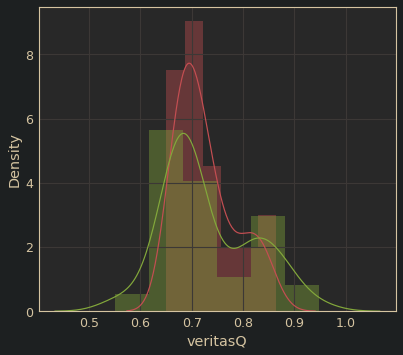

In [201]:
sns.distplot(T.veritas,color='r')
sns.distplot(T.veritasQ,color='g')

<AxesSubplot:xlabel='upperQ', ylabel='Density'>

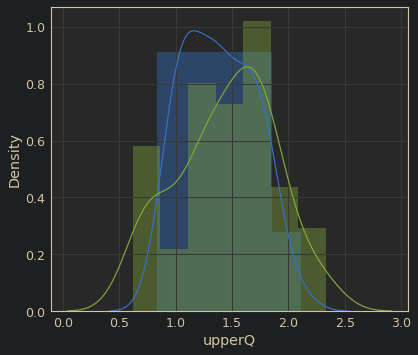

In [185]:
sns.distplot(T.upper)
sns.distplot(T.upperQ)

In [189]:
len(T[T.upperQ>1.33])

35

In [193]:
len(T[T.upper>1.245])

35

In [194]:
T[T.upper>1.245]

,veritas,upper,lower,veritasQ,upperQ,lowerQ
0,0.674906,1.742562,0.894526,0.690206,1.673808,0.924815
1,0.668239,1.276848,1.087654,0.654762,1.263943,1.068424
2,0.683333,1.448671,1.034079,0.672551,1.732845,1.080704
3,0.696154,1.436786,1.006950,0.683333,1.532898,0.952926
4,0.674906,2.111450,0.872365,0.666667,2.334580,0.849480
5,0.703521,1.367437,1.060733,0.672619,1.625217,1.008772
9,0.676862,1.547192,0.875922,0.714015,1.701000,1.073361
10,0.690929,1.878365,0.916804,0.705952,1.881855,1.015826
13,0.675096,1.727192,0.897030,0.689286,1.417545,1.163213
14,0.715272,1.635065,0.949418,0.696429,2.304382,0.942175


In [174]:
T[T.upperQ>1.33]

,veritas,upper,lower,veritasQ,upperQ,lowerQ
0,0.674906,1.742562,0.894526,0.690206,1.673808,0.924815
2,0.683333,1.448671,1.034079,0.672551,1.732845,1.080704
3,0.696154,1.436786,1.006950,0.683333,1.532898,0.952926
4,0.674906,2.111450,0.872365,0.666667,2.334580,0.849480
5,0.703521,1.367437,1.060733,0.672619,1.625217,1.008772
8,0.735569,1.097669,1.168114,0.678571,1.852911,0.902593
9,0.676862,1.547192,0.875922,0.714015,1.701000,1.073361
10,0.690929,1.878365,0.916804,0.705952,1.881855,1.015826
11,0.662745,1.108004,1.035339,0.723810,1.447091,1.080780
13,0.675096,1.727192,0.897030,0.689286,1.417545,1.163213


In [179]:
len(T[T.veritasQ>.76])

17

In [181]:
len(T[T.veritas>.76])

14

In [195]:
RnegjsonSEL=reveal(X_neg_jsonSEL,veritas_modelpath,perturb=0)
rnegSEL_=[(x.get('veritas'),x.get('score'),x.get('lower_threshold')) for x in RnegjsonSEL[0]]
rnegSEL=pd.DataFrame(rnegSEL_,columns=['veritas','upper','lower'])

ckeck passed


<AxesSubplot:>

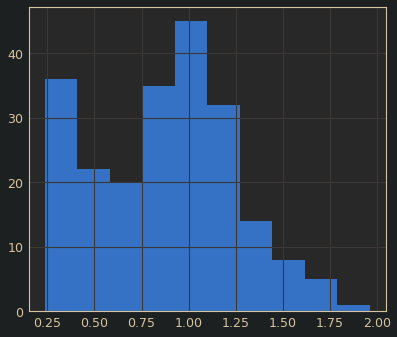

In [199]:
rnegSEL.upper.hist()

<AxesSubplot:>

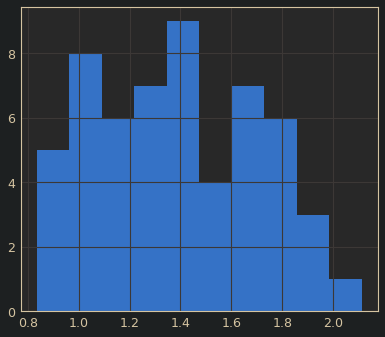

In [200]:
rposSEL.upper.hist()